In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.datasets import fetch_california_housing

In [2]:
# Load the California housing dataset
california_housing = fetch_california_housing()
data = pd.DataFrame(data=np.c_[california_housing['data'], california_housing['target']],
                    columns=california_housing['feature_names'] + ['target'])

In [3]:
# Display the first 5 rows of the dataset
print(data.head())

   MedInc  HouseAge  AveRooms  AveBedrms  Population  AveOccup  Latitude  \
0  8.3252      41.0  6.984127   1.023810       322.0  2.555556     37.88   
1  8.3014      21.0  6.238137   0.971880      2401.0  2.109842     37.86   
2  7.2574      52.0  8.288136   1.073446       496.0  2.802260     37.85   
3  5.6431      52.0  5.817352   1.073059       558.0  2.547945     37.85   
4  3.8462      52.0  6.281853   1.081081       565.0  2.181467     37.85   

   Longitude  target  
0    -122.23   4.526  
1    -122.22   3.585  
2    -122.24   3.521  
3    -122.25   3.413  
4    -122.25   3.422  


In [4]:
# Summary statistics of the numerical features
print(data.describe())

             MedInc      HouseAge      AveRooms     AveBedrms    Population  \
count  20640.000000  20640.000000  20640.000000  20640.000000  20640.000000   
mean       3.870671     28.639486      5.429000      1.096675   1425.476744   
std        1.899822     12.585558      2.474173      0.473911   1132.462122   
min        0.499900      1.000000      0.846154      0.333333      3.000000   
25%        2.563400     18.000000      4.440716      1.006079    787.000000   
50%        3.534800     29.000000      5.229129      1.048780   1166.000000   
75%        4.743250     37.000000      6.052381      1.099526   1725.000000   
max       15.000100     52.000000    141.909091     34.066667  35682.000000   

           AveOccup      Latitude     Longitude        target  
count  20640.000000  20640.000000  20640.000000  20640.000000  
mean       3.070655     35.631861   -119.569704      2.068558  
std       10.386050      2.135952      2.003532      1.153956  
min        0.692308     32.54000

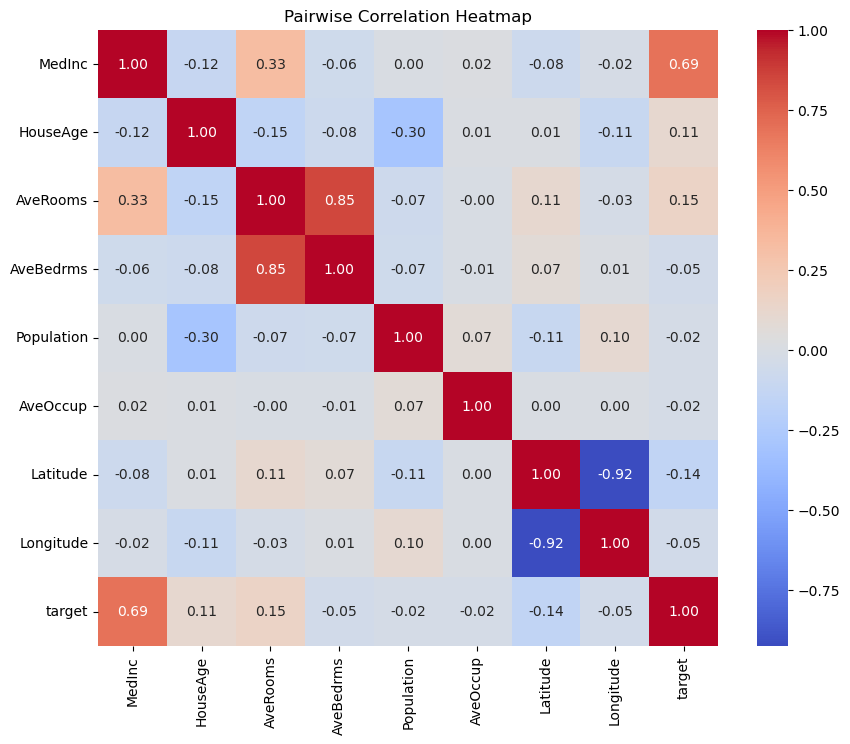

In [5]:
# Pairwise correlation heatmap
correlation_matrix = data.corr()
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Pairwise Correlation Heatmap')
plt.show()

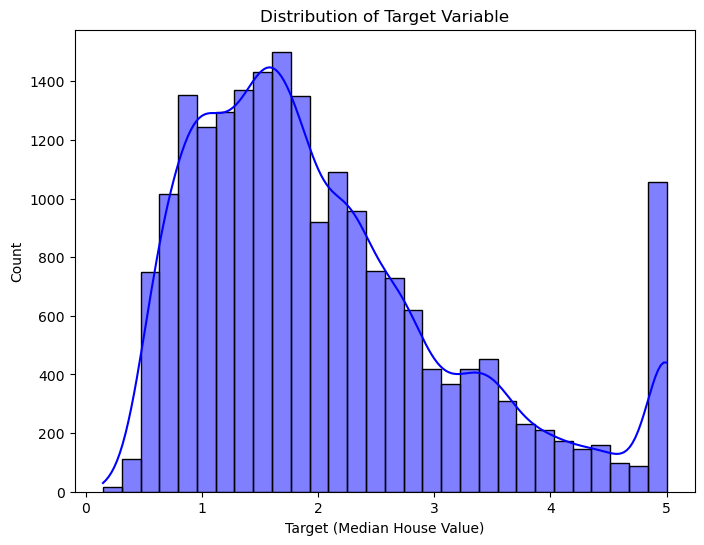

In [6]:
# Distribution of the target variable
plt.figure(figsize=(8, 6))
sns.histplot(data['target'], bins=30, kde=True, color='blue')
plt.title('Distribution of Target Variable')
plt.xlabel('Target (Median House Value)')
plt.show()

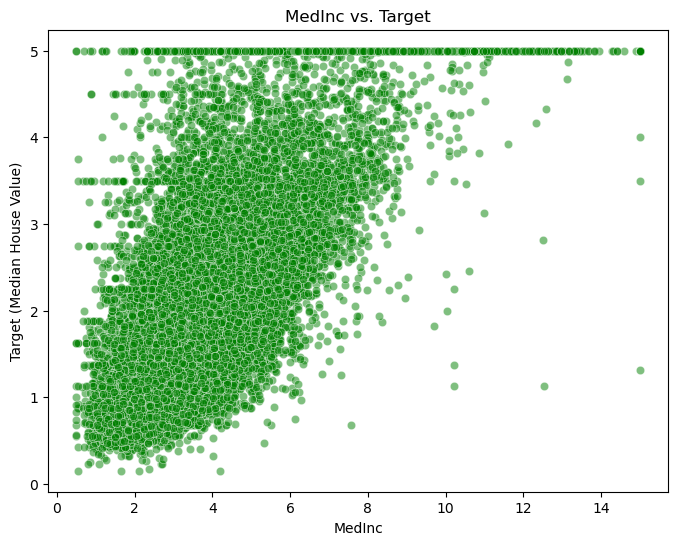

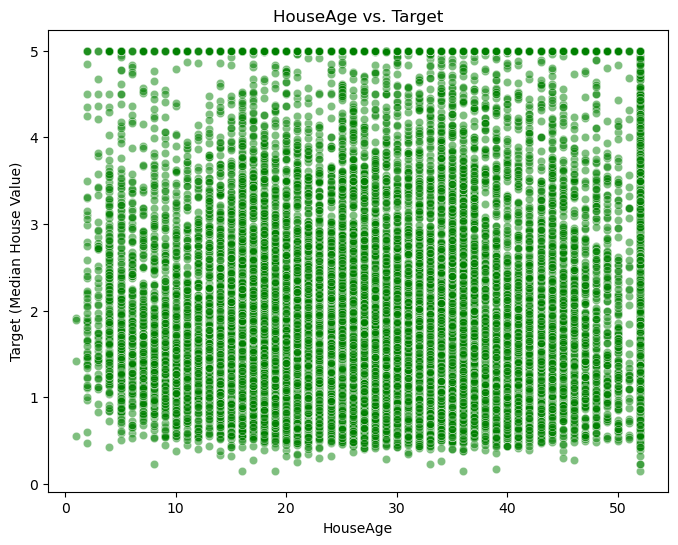

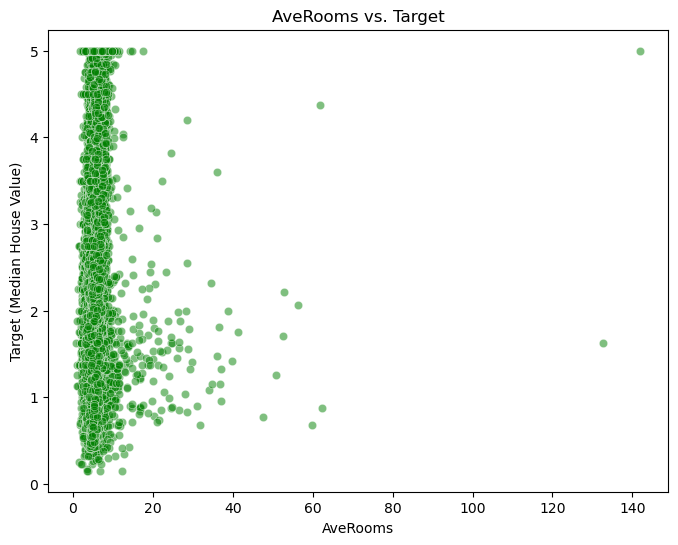

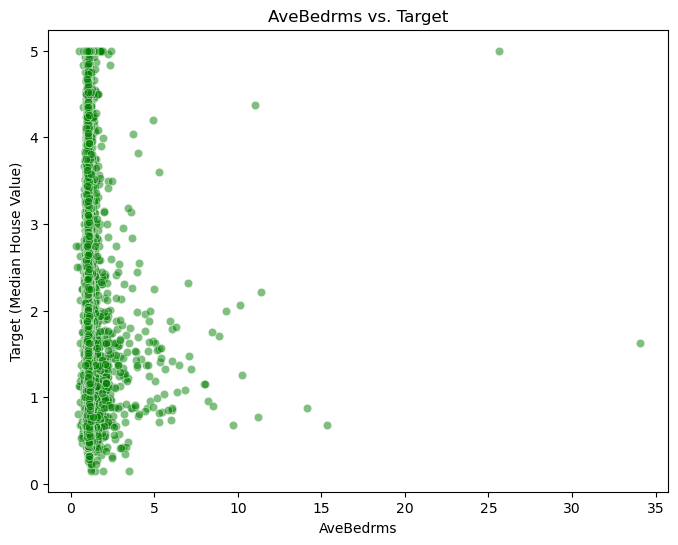

In [7]:
# Scatter plot of selected features against the target variable
selected_features = ['MedInc', 'HouseAge', 'AveRooms', 'AveBedrms']

for feature in selected_features:
    plt.figure(figsize=(8, 6))
    sns.scatterplot(x=data[feature], y=data['target'], color='green', alpha=0.5)
    plt.title(f'{feature} vs Target')
    plt.xlabel(feature)
    plt.ylabel('Target (Median House Value)')
    plt.show()

In [8]:
from sklearn.datasets import fetch_california_housing
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split
from sklearn.neural_network import MLPRegressor
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler

In [9]:
housing = fetch_california_housing()
X_train_full, X_test, y_train_full, y_test = train_test_split(housing.data, housing.target, random_state=42)
X_train, X_valid, y_train, y_valid = train_test_split(X_train_full, y_train_full, random_state=42)

In [10]:
mlp_reg = MLPRegressor(hidden_layer_sizes=[25, 25, 25], random_state=42)
pipeline = make_pipeline(StandardScaler(), mlp_reg)

In [11]:
pipeline.fit(X_train, y_train)
y_pred = pipeline.predict(X_valid)

C:\Users\LENOVO\anaconda3\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


In [13]:
rmse = mean_squared_error(y_valid, y_pred) ** 0.5 # about 0.64
print("Root Mean Squared Error:", rmse)

Root Mean Squared Error: 0.6409306726990712


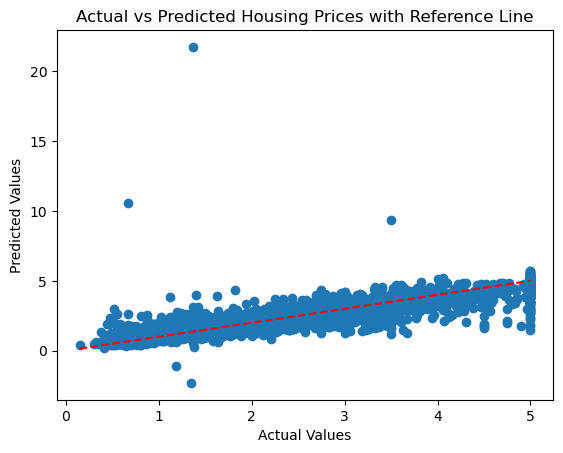

In [14]:
# Plot predicted vs actual values
plt.plot([min(y_valid), max(y_valid)], [min(y_valid), max(y_valid)], linestyle='--', color='red')
plt.scatter(y_valid, y_pred)
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.title('Actual vs Predicted Housing Prices with Reference Line')
plt.show()

In [15]:
import numpy as np
import pandas as pd
from sklearn.datasets import fetch_california_housing
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error
from keras.models import Sequential
from keras.layers import Dense
from keras.optimizers import Adam

In [16]:
# Load the California housing dataset
california_housing = fetch_california_housing()
data = pd.DataFrame(data=np.c_[california_housing['data'], california_housing['target']],
                    columns=california_housing['feature_names'] + ['target'])

In [17]:
# # Select features and target variable
X = data.drop('target', axis=1)
y = data['target']

In [18]:
# # Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Standardize the features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [19]:
# Build the neural network model
model = Sequential()
model.add(Dense(units=512, input_dim=X_train.shape[1], activation='relu'))
model.add(Dense(units=1, activation='linear')) # Linear activation for regression

# Compile the model
model.compile(optimizer='adam', loss='mean_squared_error')

C:\Users\LENOVO\anaconda3\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [20]:
# Train the model
model.fit(X_train_scaled, y_train, epochs=100, batch_size=128, validation_data=(X_test_scaled, y_test), verbose=1)

Epoch 1/100
129/129 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - loss: 2.2331 - val_loss: 0.5886
Epoch 2/100
129/129 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.5431 - val_loss: 0.4481
Epoch 3/100
129/129 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.4111 - val_loss: 0.4126
Epoch 4/100
129/129 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.3974 - val_loss: 0.4101
Epoch 5/100
129/129 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.4001 - val_loss: 0.3880
Epoch 6/100
129/129 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.3775 - val_loss: 0.3778
Epoch 7/100
129/129 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.3788 - val_loss: 0.3738
Epoch 8/100
129/129 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.4040 - val_loss: 0.3629
Epoch 9/100
129/129 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.3557 - val_loss: 0.4440
Epoch 10/100
129/129 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.3884 - val_loss: 0.3596
Epoch 11/100
129/129 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.3799 - val_loss: 0.3542
Epoch 12/100
129/129 ━━━━━━━━━━━━━━━━━━━━

In [21]:
# Make predictions on the test set
y_pred = model.predict(X_test_scaled)

129/129 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step 


In [23]:
# Evaluate the model
rmse = mean_squared_error(y_test, y_pred) ** 0.5 #about 0.53
print("Root Mean Squared Error:", rmse)

Root Mean Squared Error: 0.5324919909421278


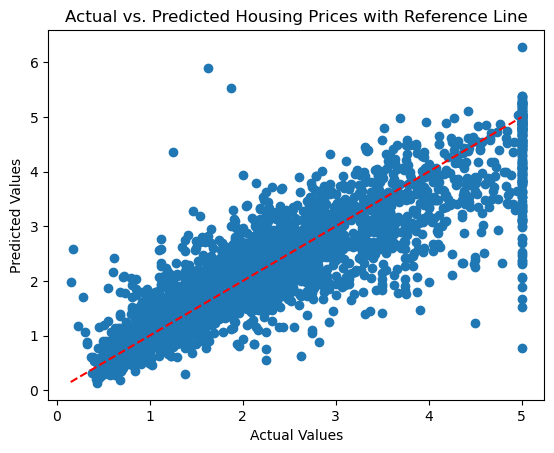

In [24]:
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], linestyle='--', color='red')
plt.scatter(y_test, y_pred)
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.title('Actual vs Predicted Housing Prices with Reference Line')
plt.show()